In [51]:
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

In [52]:
df = pd.read_csv('./smi.csv', names=['Name','SMILES'])
df

,Name,SMILES
0,pi1,N1C(=O)C2=CC3=C(C=C2C1=O)C(=O)N(C3=O)C1=CC=C(...
1,p12,N1C(=O)C2=CC3=C(C=C2C1=O)C(=O)N(C3=O)C1=CC=C(...
2,benzene,c1ccccc1
3,cyclohexane,C1CCCCC1
4,styrene,C=Cc1ccccc1


In [54]:
mols = [Chem.MolFromSmiles(smi) for smi in df.SMILES]
hmols = [Chem.AddHs(m) for m in mols]
for mol  in hmols:
    AllChem.EmbedMolecule(mol,AllChem.ETKDG())
    print(AllChem.UFFOptimizeMolecule(mol,1000))
    
smiles = list(df.SMILES)
#sid = list(df.SOURCE_ID)
#libs = df[df.columns[0]]
writer = Chem.SDWriter('TEST.sdf')

for n in range(len(df)):
    #hmols[n].SetProp("_Library","%s"%libs[n])
    #hmols[n].SetProp("_Name","%s"%sid[n])
    #hmols[n].SetProp("_SourceID","%s"%sid[n])
    hmols[n].SetProp("_SMILES","%s"%smiles[n])
    writer.write(hmols[n])
writer.close()

0
0
0
0
0


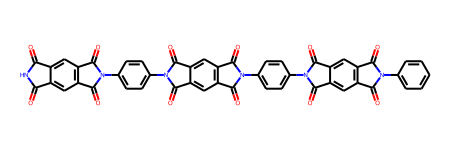

In [50]:
mols[0]

H로 passivation 된 PMDA-PDA 의 oligomer 가 Mol object 로 생성되었고,  
3D 구조로도 성공적으로 변환이 된다.